In [2]:
import torch as T
import torch.nn as NN
import torch.nn.functional as F
import models
import losses
from util import *
import numpy.random as RNG
from datasets import MNISTMulti

In [3]:
mnist = MNISTMulti('.', n_digits=1, backrand=128, image_rows=70, image_cols=70)
batch_size = 32
mnist_dataloader = T.utils.data.DataLoader(mnist, batch_size=batch_size, shuffle=True, drop_last=True)

In [4]:
mnist.train_data.size()

torch.Size([60000, 70, 70])

torch.Size([60000, 1, 4])
[3]


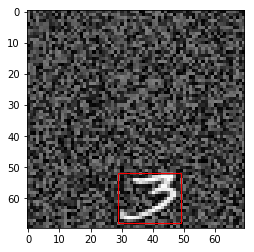

In [5]:
import matplotlib.pyplot as PL
i = 2500
PL.imshow(mnist.train_data[i].numpy(), cmap='gray')
print(mnist.train_locs.size())
addbox(PL.gca(), mnist.train_locs[i, 0].numpy(), 'red')
#addbox(PL.gca(), mnist.train_locs[i, 1].numpy(), 'red')
#addbox(PL.gca(), mnist.train_locs[i, 2].numpy(), 'red')
print(mnist.train_labels[i].numpy())
PL.show()

In [ ]:
model = models.SequentialGlimpsedClassifier()
opt = T.optim.Adam(model.parameters())
#loss_fn = losses.RLClassifierLoss()
loss_fn = losses.SupervisedClassifierLoss()
ones = T.ones(batch_size, 10).long()

print(dict(model.named_parameters()).keys())

for epoch in range(1):
    for i, (x, _y, B) in enumerate(mnist_dataloader):
        batch_size, n_rows, n_cols = x.size()
        y = T.LongTensor(batch_size, 10).zero_().scatter_add_(1, _y, ones)
        x = tovar(x.float() / 255)
        y = tovar(y)
        __y = tovar(_y)
        B = tovar(B)
        for j in range(1000000):
            y_hat, y_hat_logprob, p, p_logprob = model(x.unsqueeze(1).expand(batch_size, 3, n_rows, n_cols))
            loss = loss_fn(__y[:, 0], model.y_pre, model.p_pre)
            opt.zero_grad()
            loss.backward()
            grad_clip(model.parameters(), 1)
            opt.step()
            if j % 100 == 0:
                #print(epoch, i, tonumpy(loss_fn.r).sum(1).mean(), tonumpy(loss))
                print(epoch, i, tonumpy((__y[:, 0] == model.y_pre.max(-1)[1][:, -1]).sum()), tonumpy(loss))
                if j % 1000 == 0:
                    print('_y', tonumpy(_y).squeeze())
                    print('y_hat', tonumpy(y_hat)[:, :, 0].squeeze())
                    print('p', tonumpy(p)[:, :, 0].squeeze())

dict_keys(['cnn.0.weight', 'cnn.0.bias', 'cnn.2.weight', 'cnn.2.bias', 'cnn.4.weight', 'cnn.4.bias', 'lstm.weight_ih', 'lstm.weight_hh', 'lstm.bias_ih', 'lstm.bias_hh', 'proj_y.0.weight', 'proj_y.0.bias', 'proj_y.2.weight', 'proj_y.2.bias', 'proj_p.0.weight', 'proj_p.0.bias', 'proj_p.2.weight', 'proj_p.2.bias', 'proj_B.0.weight', 'proj_B.0.bias', 'proj_B.2.weight', 'proj_B.2.bias', 'y_in.weight'])
0 0 [3] [2.9890397]
_y [9 1 9 8 3 1 3 8 4 4 8 7 6 9 1 1 9 5 5 9 7 3 5 8 6 4 6 4 6 0 6 3]
y_hat [[2 1 2 6 5 3 8 5 0 7]
 [3 3 8 6 2 5 0 1 5 0]
 [8 2 7 1 9 5 4 8 1 7]
 [7 8 2 0 8 4 5 2 2 6]
 [7 2 0 8 0 0 8 0 9 4]
 [5 5 4 3 1 1 8 5 2 9]
 [3 9 2 5 6 2 4 9 9 2]
 [9 1 9 5 3 2 0 6 6 7]
 [9 8 9 9 2 5 7 3 2 4]
 [8 4 1 1 3 2 7 9 9 3]
 [7 2 2 5 4 8 7 4 2 0]
 [9 3 2 9 9 1 2 0 2 1]
 [1 6 2 4 8 3 7 7 1 6]
 [0 4 6 3 3 7 3 7 3 2]
 [6 9 4 8 5 2 1 9 1 8]
 [3 5 4 2 0 1 7 3 0 3]
 [6 7 2 3 0 7 5 9 4 0]
 [6 9 2 4 0 4 0 9 4 5]
 [2 4 2 8 8 9 9 7 1 2]
 [9 9 7 3 3 2 4 4 8 3]
 [1 3 5 4 8 5 6 9 4 3]
 [6 5 4 8 8 9 6 1 8 2

0 0 [30] [0.31394768]


In [6]:
model.y_pre

Variable containing:
(0 ,.,.) = 
 -3.7310  0.8901 -1.0002  ...   8.1080  1.9617 -2.9634
 -3.0283  0.9833  0.2227  ...   4.5098  1.7510 -1.1108
 -3.0588  1.0814  0.3617  ...   4.3455  1.8037 -0.9560
           ...             ⋱             ...          
 -3.0598  1.0977  0.4071  ...   4.2593  1.8043 -0.8972
 -3.0597  1.0977  0.4075  ...   4.2584  1.8041 -0.8967
 -3.0596  1.0976  0.4077  ...   4.2578  1.8040 -0.8964

(1 ,.,.) = 
 -3.7309  0.8901 -1.0002  ...   8.1077  1.9616 -2.9633
 -3.0284  0.9834  0.2227  ...   4.5100  1.7511 -1.1108
 -3.0594  1.0815  0.3613  ...   4.3472  1.8040 -0.9567
           ...             ⋱             ...          
 -3.0604  1.0979  0.4066  ...   4.2614  1.8047 -0.8981
 -3.0603  1.0979  0.4070  ...   4.2605  1.8045 -0.8976
 -3.0602  1.0978  0.4072  ...   4.2599  1.8044 -0.8973

(2 ,.,.) = 
 -3.7318  0.8900 -1.0006  ...   8.1096  1.9623 -2.9640
 -3.0291  0.9831  0.2226  ...   4.5108  1.7516 -1.1111
 -3.0605  1.0817  0.3604  ...   4.3508  1.8046 -0.9582
      